In [1]:
# star formation histories

In [50]:
import csv
import h5py
import requests
import numpy as np
import scipy.integrate
import illustris_python as il
import matplotlib.pyplot as plt
from itertools import zip_longest
from scipy.optimize import fminbound
from hoki.csp.eventrate import CSPEventRate
from hoki.constants import BPASS_EVENT_TYPES, BPASS_METALLICITIES

import matplotlib as mpl

In [3]:
data = h5py.File(f"./data.h5", "r")
redshifts = data['SFH']['TNG'].attrs['redshift']

In [4]:
@np.vectorize
def calc_LB(z, omega0, omega1, hubble):
    '''
    Calculates the lookback time according to Hobbs.

    Parameters:
    z : float
        The redshift at which you want to calculate the lookback
    omega0 : float
        The Matter density parameter (0.3111 Planck 2018)
    omega1 : float
        The dark energy density parameter (0.6889 Planck 2018)
    hubble : float
        The hubble parameters (0.6766 Planck 2018)
    '''
    def func(x):
        E = np.sqrt(omega0*(1+x)**3 + omega1)
        return 1/((1+x)*E)
    # can be simplified by already doing the extra coefficient calculations
    t_hubble = (1/(100*hubble))*3.0856776*10**19
    return t_hubble *scipy.integrate.quad(func, 0, z)[0]/(60*60*24*365.2388526)

In [79]:
h = 0.6774
omega_M = 0.3089
omega_L = 0.6911

lb_time99 = calc_LB(redshifts, omega_M, omega_L, h)
lb_time91_old = calc_LB(redshifts[8:], omega_M, omega_L, h)
lb_time84 = calc_LB(redshifts[15:], omega_M, omega_L, h)
lb_time78 = calc_LB(redshifts[21:], omega_M, omega_L, h)
lb_time72 = calc_LB(redshifts[27:], omega_M, omega_L, h)
lb_time67 = calc_LB(redshifts[32:], omega_M, omega_L, h)
lb_time50_old = calc_LB(redshifts[49:], omega_M, omega_L, h)
lb_time33 = calc_LB(redshifts[66:], omega_M, omega_L, h)
lb_time25 = calc_LB(redshifts[74:], omega_M, omega_L, h)
lb_time21 = calc_LB(redshifts[78:], omega_M, omega_L, h)
lb_time17 = calc_LB(redshifts[82:], omega_M, omega_L, h)
lb_time04 = calc_LB(redshifts[95:], omega_M, omega_L, h)

lb_time91 = [num/1e9 for num in lb_time91_old]
lb_time50 = [num/1e9 for num in lb_time50_old]

In [6]:
allSFR2 = []
with open('./Subhalo Data/mass2_99', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR2.append(row)
for index, sfr_list in enumerate(allSFR2):
    allSFR2[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR2 = [sum(x) for x in zip(allSFR2[0], allSFR2[1], allSFR2[2], allSFR2[3], allSFR2[4], allSFR2[5], allSFR2[6], allSFR2[7], allSFR2[8], allSFR2[9])]
SFH2_99 = [num*(139/10)/(106.5**3) for num in SFR2]  # normalisation

allSFR2 = []
with open('./Subhalo Data/mass2_91', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR2.append(row)
for index, sfr_list in enumerate(allSFR2):
    allSFR2[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR2 = [sum(x) for x in zip(allSFR2[0], allSFR2[1], allSFR2[2], allSFR2[3], allSFR2[4], allSFR2[5], allSFR2[6], allSFR2[7], allSFR2[8], allSFR2[9])]
SFH2_91 = [num*(128/10)/(106.5**3) for num in SFR2]  # normalisation

allSFR2 = []
with open('./Subhalo Data/mass2_84', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR2.append(row)
for index, sfr_list in enumerate(allSFR2):
    allSFR2[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR2 = [sum(x) for x in zip(allSFR2[0], allSFR2[1], allSFR2[2], allSFR2[3], allSFR2[4], allSFR2[5], allSFR2[6], allSFR2[7], allSFR2[8], allSFR2[9])]
SFH2_84 = [num*(127/10)/(106.5**3) for num in SFR2]  # normalisation

allSFR2 = []
with open('./Subhalo Data/mass2_78', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR2.append(row)
for index, sfr_list in enumerate(allSFR2):
    allSFR2[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR2 = [sum(x) for x in zip(allSFR2[0], allSFR2[1], allSFR2[2], allSFR2[3], allSFR2[4], allSFR2[5], allSFR2[6], allSFR2[7], allSFR2[8], allSFR2[9])]
SFH2_78 = [num*(123/10)/(106.5**3) for num in SFR2]  # normalisation

allSFR2 = []
with open('./Subhalo Data/mass2_72', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR2.append(row)
for index, sfr_list in enumerate(allSFR2):
    allSFR2[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR2 = [sum(x) for x in zip(allSFR2[0], allSFR2[1], allSFR2[2], allSFR2[3], allSFR2[4], allSFR2[5], allSFR2[6], allSFR2[7], allSFR2[8], allSFR2[9])]
SFH2_72 = [num*(111/10)/(106.5**3) for num in SFR2]  # normalisation

allSFR2 = []
with open('./Subhalo Data/mass2_67', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR2.append(row)
for index, sfr_list in enumerate(allSFR2):
    allSFR2[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR2 = [sum(x) for x in zip(allSFR2[0], allSFR2[1], allSFR2[2], allSFR2[3], allSFR2[4], allSFR2[5], allSFR2[6], allSFR2[7], allSFR2[8], allSFR2[9])]
SFH2_67 = [num*(98/10)/(106.5**3) for num in SFR2]  # normalisation

allSFR2 = []
with open('./Subhalo Data/mass2_50', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR2.append(row)
for index, sfr_list in enumerate(allSFR2):
    allSFR2[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR2 = [sum(x) for x in zip(allSFR2[0], allSFR2[1], allSFR2[2], allSFR2[3], allSFR2[4], allSFR2[5], allSFR2[6], allSFR2[7], allSFR2[8], allSFR2[9])]
SFH2_50 = [num*(55/10)/(106.5**3) for num in SFR2]  # normalisation

allSFR2 = []
with open('./Subhalo Data/mass2_33', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR2.append(row)
for index, sfr_list in enumerate(allSFR2):
    allSFR2[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR2 = [sum(x) for x in zip(allSFR2[0], allSFR2[1], allSFR2[2], allSFR2[3], allSFR2[4], allSFR2[5], allSFR2[6], allSFR2[7], allSFR2[8], allSFR2[9])]
SFH2_33 = [num*(12/10)/(106.5**3) for num in SFR2]  # normalisation

In [7]:
allSFR3 = []
with open('./Subhalo Data/mass3_99', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR3.append(row)
for index, sfr_list in enumerate(allSFR3):
    allSFR3[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR3 = [sum(x) for x in zip(allSFR3[0], allSFR3[1], allSFR3[2], allSFR3[3], allSFR3[4], allSFR3[5], allSFR3[6], allSFR3[7], allSFR3[8], allSFR3[9])]
SFH3_99 = [num*(1371/10)/(106.5**3) for num in SFR3]  # normalisation

allSFR3 = []
with open('./Subhalo Data/mass3_91', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR3.append(row)
for index, sfr_list in enumerate(allSFR3):
    allSFR3[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR3 = [sum(x) for x in zip(allSFR3[0], allSFR3[1], allSFR3[2], allSFR3[3], allSFR3[4], allSFR3[5], allSFR3[6], allSFR3[7], allSFR3[8], allSFR3[9])]
SFH3_91 = [num*(1356/10)/(106.5**3) for num in SFR3]  # normalisation

allSFR3 = []
with open('./Subhalo Data/mass3_84', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR3.append(row)
for index, sfr_list in enumerate(allSFR3):
    allSFR3[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR3 = [sum(x) for x in zip(allSFR3[0], allSFR3[1], allSFR3[2], allSFR3[3], allSFR3[4], allSFR3[5], allSFR3[6], allSFR3[7], allSFR3[8], allSFR3[9])]
SFH3_84 = [num*(1339/10)/(106.5**3) for num in SFR3]  # normalisation

allSFR3 = []
with open('./Subhalo Data/mass3_78', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR3.append(row)
for index, sfr_list in enumerate(allSFR3):
    allSFR3[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR3 = [sum(x) for x in zip(allSFR3[0], allSFR3[1], allSFR3[2], allSFR3[3], allSFR3[4], allSFR3[5], allSFR3[6], allSFR3[7], allSFR3[8], allSFR3[9])]
SFH3_78 = [num*(1341/10)/(106.5**3) for num in SFR3]  # normalisation

allSFR3 = []
with open('./Subhalo Data/mass3_72', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR3.append(row)
for index, sfr_list in enumerate(allSFR3):
    allSFR3[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR3 = [sum(x) for x in zip(allSFR3[0], allSFR3[1], allSFR3[2], allSFR3[3], allSFR3[4], allSFR3[5], allSFR3[6], allSFR3[7], allSFR3[8], allSFR3[9])]
SFH3_72 = [num*(1323/10)/(106.5**3) for num in SFR3]  # normalisation

allSFR3 = []
with open('./Subhalo Data/mass3_67', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR3.append(row)
for index, sfr_list in enumerate(allSFR3):
    allSFR3[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR3 = [sum(x) for x in zip(allSFR3[0], allSFR3[1], allSFR3[2], allSFR3[3], allSFR3[4], allSFR3[5], allSFR3[6], allSFR3[7], allSFR3[8], allSFR3[9])]
SFH3_67 = [num*(1316/10)/(106.5**3) for num in SFR3]  # normalisation

allSFR3 = []
with open('./Subhalo Data/mass3_50', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR3.append(row)
for index, sfr_list in enumerate(allSFR3):
    allSFR3[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR3 = [sum(x) for x in zip(allSFR3[0], allSFR3[1], allSFR3[2], allSFR3[3], allSFR3[4], allSFR3[5], allSFR3[6], allSFR3[7], allSFR3[8], allSFR3[9])]
SFH3_50 = [num*(1171/10)/(106.5**3) for num in SFR3]  # normalisation

allSFR3 = []
with open('./Subhalo Data/mass3_33', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR3.append(row)
for index, sfr_list in enumerate(allSFR3):
    allSFR3[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR3 = [sum(x) for x in zip(allSFR3[0], allSFR3[1], allSFR3[2], allSFR3[3], allSFR3[4], allSFR3[5], allSFR3[6], allSFR3[7], allSFR3[8], allSFR3[9])]
SFH3_33 = [num*(624/10)/(106.5**3) for num in SFR3]  # normalisation

allSFR3 = []
with open('./Subhalo Data/mass3_25', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR3.append(row)
for index, sfr_list in enumerate(allSFR3):
    allSFR3[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR3 = [sum(x) for x in zip(allSFR3[0], allSFR3[1], allSFR3[2], allSFR3[3], allSFR3[4], allSFR3[5], allSFR3[6], allSFR3[7], allSFR3[8], allSFR3[9])]
SFH3_25 = [num*(233/10)/(106.5**3) for num in SFR3]  # normalisation

allSFR3 = []
with open('./Subhalo Data/mass3_21', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR3.append(row)
for index, sfr_list in enumerate(allSFR3):
    allSFR3[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR3 = [sum(x) for x in zip(allSFR3[0], allSFR3[1], allSFR3[2], allSFR3[3], allSFR3[4], allSFR3[5], allSFR3[6], allSFR3[7], allSFR3[8], allSFR3[9])]
SFH3_21 = [num*(56/10)/(106.5**3) for num in SFR3]  # normalisation

allSFR3 = []
with open('./Subhalo Data/mass3_17', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR3.append(row)
for index, sfr_list in enumerate(allSFR3):
    allSFR3[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR3 = [sum(x) for x in zip(allSFR3[0], allSFR3[1], allSFR3[2], allSFR3[3], allSFR3[4], allSFR3[5], allSFR3[6], allSFR3[7], allSFR3[8], allSFR3[9])]
SFH3_17 = [num*(10/10)/(106.5**3) for num in SFR3]  # normalisation

In [8]:
allSFR4 = []
with open('./Subhalo Data/mass4_99', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR4.append(row)
for index, sfr_list in enumerate(allSFR4):
    allSFR4[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR4 = [sum(x) for x in zip(allSFR4[0], allSFR4[1], allSFR4[2], allSFR4[3], allSFR4[4], allSFR4[5], allSFR4[6], allSFR4[7], allSFR4[8], allSFR4[9])]
SFH4_99 = [num*(12271/10)/(106.5**3) for num in SFR4]  # normalisation

allSFR4 = []
with open('./Subhalo Data/mass4_91', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR4.append(row)
for index, sfr_list in enumerate(allSFR4):
    allSFR4[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR4 = [sum(x) for x in zip(allSFR4[0], allSFR4[1], allSFR4[2], allSFR4[3], allSFR4[4], allSFR4[5], allSFR4[6], allSFR4[7], allSFR4[8], allSFR4[9])]
SFH4_91 = [num*(12305/10)/(106.5**3) for num in SFR4]  # normalisation

allSFR4 = []
with open('./Subhalo Data/mass4_84', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR4.append(row)
for index, sfr_list in enumerate(allSFR4):
    allSFR4[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR4 = [sum(x) for x in zip(allSFR4[0], allSFR4[1], allSFR4[2], allSFR4[3], allSFR4[4], allSFR4[5], allSFR4[6], allSFR4[7], allSFR4[8], allSFR4[9])]
SFH4_84 = [num*(12308/10)/(106.5**3) for num in SFR4]  # normalisation

allSFR4 = []
with open('./Subhalo Data/mass4_78', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR4.append(row)
for index, sfr_list in enumerate(allSFR4):
    allSFR4[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR4 = [sum(x) for x in zip(allSFR4[0], allSFR4[1], allSFR4[2], allSFR4[3], allSFR4[4], allSFR4[5], allSFR4[6], allSFR4[7], allSFR4[8], allSFR4[9])]
SFH4_78 = [num*(12279/10)/(106.5**3) for num in SFR4]  # normalisation

allSFR4 = []
with open('./Subhalo Data/mass4_72', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR4.append(row)
for index, sfr_list in enumerate(allSFR4):
    allSFR4[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR4 = [sum(x) for x in zip(allSFR4[0], allSFR4[1], allSFR4[2], allSFR4[3], allSFR4[4], allSFR4[5], allSFR4[6], allSFR4[7], allSFR4[8], allSFR4[9])]
SFH4_72 = [num*(12208/10)/(106.5**3) for num in SFR4]  # normalisation

allSFR4 = []
with open('./Subhalo Data/mass4_67', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR4.append(row)
for index, sfr_list in enumerate(allSFR4):
    allSFR4[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR4 = [sum(x) for x in zip(allSFR4[0], allSFR4[1], allSFR4[2], allSFR4[3], allSFR4[4], allSFR4[5], allSFR4[6], allSFR4[7], allSFR4[8], allSFR4[9])]
SFH4_67 = [num*(12112/10)/(106.5**3) for num in SFR4]  # normalisation

allSFR4 = []
with open('./Subhalo Data/mass4_50', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR4.append(row)
for index, sfr_list in enumerate(allSFR4):
    allSFR4[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR4 = [sum(x) for x in zip(allSFR4[0], allSFR4[1], allSFR4[2], allSFR4[3], allSFR4[4], allSFR4[5], allSFR4[6], allSFR4[7], allSFR4[8], allSFR4[9])]
SFH4_50 = [num*(11594/10)/(106.5**3) for num in SFR4]  # normalisation

allSFR4 = []
with open('./Subhalo Data/mass4_33', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR4.append(row)
for index, sfr_list in enumerate(allSFR4):
    allSFR4[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR4 = [sum(x) for x in zip(allSFR4[0], allSFR4[1], allSFR4[2], allSFR4[3], allSFR4[4], allSFR4[5], allSFR4[6], allSFR4[7], allSFR4[8], allSFR4[9])]
SFH4_33 = [num*(9308/10)/(106.5**3) for num in SFR4]  # normalisation

allSFR4 = []
with open('./Subhalo Data/mass4_25', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR4.append(row)
for index, sfr_list in enumerate(allSFR4):
    allSFR4[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR4 = [sum(x) for x in zip(allSFR4[0], allSFR4[1], allSFR4[2], allSFR4[3], allSFR4[4], allSFR4[5], allSFR4[6], allSFR4[7], allSFR4[8], allSFR4[9])]
SFH4_25 = [num*(5911/10)/(106.5**3) for num in SFR4]  # normalisation

allSFR4 = []
with open('./Subhalo Data/mass4_21', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR4.append(row)
for index, sfr_list in enumerate(allSFR4):
    allSFR4[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR4 = [sum(x) for x in zip(allSFR4[0], allSFR4[1], allSFR4[2], allSFR4[3], allSFR4[4], allSFR4[5], allSFR4[6], allSFR4[7], allSFR4[8], allSFR4[9])]
SFH4_21 = [num*(3175/10)/(106.5**3) for num in SFR4]  # normalisation

allSFR4 = []
with open('./Subhalo Data/mass4_17', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR4.append(row)
for index, sfr_list in enumerate(allSFR4):
    allSFR4[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR4 = [sum(x) for x in zip(allSFR4[0], allSFR4[1], allSFR4[2], allSFR4[3], allSFR4[4], allSFR4[5], allSFR4[6], allSFR4[7], allSFR4[8], allSFR4[9])]
SFH4_17 = [num*(1387/10)/(106.5**3) for num in SFR4]  # normalisation

In [9]:
allSFR5 = []
with open('./Subhalo Data/mass5_99', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR5.append(row)
for index, sfr_list in enumerate(allSFR5):
    allSFR5[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR5 = [sum(x) for x in zip(allSFR5[0], allSFR5[1], allSFR5[2], allSFR5[3], allSFR5[4], allSFR5[5], allSFR5[6], allSFR5[7], allSFR5[8], allSFR5[9])]
SFH5_99 = [num*(85812/10)/(106.5**3) for num in SFR5]  # normalisation

allSFR5 = []
with open('./Subhalo Data/mass5_91', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR5.append(row)
for index, sfr_list in enumerate(allSFR5):
    allSFR5[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR5 = [sum(x) for x in zip(allSFR5[0], allSFR5[1], allSFR5[2], allSFR5[3], allSFR5[4], allSFR5[5], allSFR5[6], allSFR5[7], allSFR5[8], allSFR5[9])]
SFH5_91 = [num*(86196/10)/(106.5**3) for num in SFR5]  # normalisation

allSFR5 = []
with open('./Subhalo Data/mass5_84', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR5.append(row)
for index, sfr_list in enumerate(allSFR5):
    allSFR5[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR5 = [sum(x) for x in zip(allSFR5[0], allSFR5[1], allSFR5[2], allSFR5[3], allSFR5[4], allSFR5[5], allSFR5[6], allSFR5[7], allSFR5[8], allSFR5[9])]
SFH5_84 = [num*(86612/10)/(106.5**3) for num in SFR5]  # normalisation

allSFR5 = []
with open('./Subhalo Data/mass5_78', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR5.append(row)
for index, sfr_list in enumerate(allSFR5):
    allSFR5[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR5 = [sum(x) for x in zip(allSFR5[0], allSFR5[1], allSFR5[2], allSFR5[3], allSFR5[4], allSFR5[5], allSFR5[6], allSFR5[7], allSFR5[8], allSFR5[9])]
SFH5_78 = [num*(87180/10)/(106.5**3) for num in SFR5]  # normalisation

allSFR5 = []
with open('./Subhalo Data/mass5_72', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR5.append(row)
for index, sfr_list in enumerate(allSFR5):
    allSFR5[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR5 = [sum(x) for x in zip(allSFR5[0], allSFR5[1], allSFR5[2], allSFR5[3], allSFR5[4], allSFR5[5], allSFR5[6], allSFR5[7], allSFR5[8], allSFR5[9])]
SFH5_72 = [num*(87577/10)/(106.5**3) for num in SFR5]  # normalisation

allSFR5 = []
with open('./Subhalo Data/mass5_67', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR5.append(row)
for index, sfr_list in enumerate(allSFR5):
    allSFR5[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR5 = [sum(x) for x in zip(allSFR5[0], allSFR5[1], allSFR5[2], allSFR5[3], allSFR5[4], allSFR5[5], allSFR5[6], allSFR5[7], allSFR5[8], allSFR5[9])]
SFH5_67 = [num*(88132/10)/(106.5**3) for num in SFR5]  # normalisation

allSFR5 = []
with open('./Subhalo Data/mass5_50', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR5.append(row)
for index, sfr_list in enumerate(allSFR5):
    allSFR5[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR5 = [sum(x) for x in zip(allSFR5[0], allSFR5[1], allSFR5[2], allSFR5[3], allSFR5[4], allSFR5[5], allSFR5[6], allSFR5[7], allSFR5[8], allSFR5[9])]
SFH5_50 = [num*(89484/10)/(106.5**3) for num in SFR5]  # normalisation

allSFR5 = []
with open('./Subhalo Data/mass5_33', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR5.append(row)
for index, sfr_list in enumerate(allSFR5):
    allSFR5[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR5 = [sum(x) for x in zip(allSFR5[0], allSFR5[1], allSFR5[2], allSFR5[3], allSFR5[4], allSFR5[5], allSFR5[6], allSFR5[7], allSFR5[8], allSFR5[9])]
SFH5_33 = [num*(85889/10)/(106.5**3) for num in SFR5]  # normalisation

allSFR5 = []
with open('./Subhalo Data/mass5_25', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR5.append(row)
for index, sfr_list in enumerate(allSFR5):
    allSFR5[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR5 = [sum(x) for x in zip(allSFR5[0], allSFR5[1], allSFR5[2], allSFR5[3], allSFR5[4], allSFR5[5], allSFR5[6], allSFR5[7], allSFR5[8], allSFR5[9])]
SFH5_25 = [num*(73873/10)/(106.5**3) for num in SFR5]  # normalisation

allSFR5 = []
with open('./Subhalo Data/mass5_21', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR5.append(row)
for index, sfr_list in enumerate(allSFR5):
    allSFR5[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR5 = [sum(x) for x in zip(allSFR5[0], allSFR5[1], allSFR5[2], allSFR5[3], allSFR5[4], allSFR5[5], allSFR5[6], allSFR5[7], allSFR5[8], allSFR5[9])]
SFH5_21 = [num*(54789/10)/(106.5**3) for num in SFR5]  # normalisation

allSFR5 = []
with open('./Subhalo Data/mass5_17', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR5.append(row)
for index, sfr_list in enumerate(allSFR5):
    allSFR5[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR5 = [sum(x) for x in zip(allSFR5[0], allSFR5[1], allSFR5[2], allSFR5[3], allSFR5[4], allSFR5[5], allSFR5[6], allSFR5[7], allSFR5[8], allSFR5[9])]
SFH5_17 = [num*(35229/10)/(106.5**3) for num in SFR5]  # normalisation

allSFR5 = []
with open('./Subhalo Data/mass5_04', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR5.append(row)
for index, sfr_list in enumerate(allSFR5):
    allSFR5[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR5 = [sum(x) for x in zip(allSFR5[0], allSFR5[1], allSFR5[2], allSFR5[3], allSFR5[4], allSFR5[5], allSFR5[6], allSFR5[7], allSFR5[8], allSFR5[9])]
SFH5_04 = [num*(567/10)/(106.5**3) for num in SFR5]  # normalisation

In [10]:
allSFR6 = []
with open('./Subhalo Data/mass6_99', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR6.append(row)
for index, sfr_list in enumerate(allSFR6):
    allSFR6[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR6 = [sum(x) for x in zip(allSFR6[0], allSFR6[1], allSFR6[2], allSFR6[3], allSFR6[4], allSFR6[5], allSFR6[6], allSFR6[7], allSFR6[8], allSFR6[9])]
SFH6_99 = [num*(650475/10)/(106.5**3) for num in SFR6]  # normalisation

allSFR6 = []
with open('./Subhalo Data/mass6_91', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR6.append(row)
for index, sfr_list in enumerate(allSFR6):
    allSFR6[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR6 = [sum(x) for x in zip(allSFR6[0], allSFR6[1], allSFR6[2], allSFR6[3], allSFR6[4], allSFR6[5], allSFR6[6], allSFR6[7], allSFR6[8], allSFR6[9])]
SFH6_91 = [num*(659191/10)/(106.5**3) for num in SFR6]  # normalisation

allSFR6 = []
with open('./Subhalo Data/mass6_84', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR6.append(row)
for index, sfr_list in enumerate(allSFR6):
    allSFR6[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR6 = [sum(x) for x in zip(allSFR6[0], allSFR6[1], allSFR6[2], allSFR6[3], allSFR6[4], allSFR6[5], allSFR6[6], allSFR6[7], allSFR6[8], allSFR6[9])]
SFH6_84 = [num*(668194/10)/(106.5**3) for num in SFR6]  # normalisation

allSFR6 = []
with open('./Subhalo Data/mass6_78', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR6.append(row)
for index, sfr_list in enumerate(allSFR6):
    allSFR6[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR6 = [sum(x) for x in zip(allSFR6[0], allSFR6[1], allSFR6[2], allSFR6[3], allSFR6[4], allSFR6[5], allSFR6[6], allSFR6[7], allSFR6[8], allSFR6[9])]
SFH6_78 = [num*(676557/10)/(106.5**3) for num in SFR6]  # normalisation

allSFR6 = []
with open('./Subhalo Data/mass6_72', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR6.append(row)
for index, sfr_list in enumerate(allSFR6):
    allSFR6[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR6 = [sum(x) for x in zip(allSFR6[0], allSFR6[1], allSFR6[2], allSFR6[3], allSFR6[4], allSFR6[5], allSFR6[6], allSFR6[7], allSFR6[8], allSFR6[9])]
SFH6_72 = [num*(685313/10)/(106.5**3) for num in SFR6]  # normalisation

allSFR6 = []
with open('./Subhalo Data/mass6_67', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR6.append(row)
for index, sfr_list in enumerate(allSFR6):
    allSFR6[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR6 = [sum(x) for x in zip(allSFR6[0], allSFR6[1], allSFR6[2], allSFR6[3], allSFR6[4], allSFR6[5], allSFR6[6], allSFR6[7], allSFR6[8], allSFR6[9])]
SFH6_67 = [num*(693957/10)/(106.5**3) for num in SFR6]  # normalisation

allSFR6 = []
with open('./Subhalo Data/mass6_50', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR6.append(row)
for index, sfr_list in enumerate(allSFR6):
    allSFR6[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR6 = [sum(x) for x in zip(allSFR6[0], allSFR6[1], allSFR6[2], allSFR6[3], allSFR6[4], allSFR6[5], allSFR6[6], allSFR6[7], allSFR6[8], allSFR6[9])]
SFH6_50 = [num*(729551/10)/(106.5**3) for num in SFR6]  # normalisation

allSFR6 = []
with open('./Subhalo Data/mass6_33', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR6.append(row)
for index, sfr_list in enumerate(allSFR6):
    allSFR6[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR6 = [sum(x) for x in zip(allSFR6[0], allSFR6[1], allSFR6[2], allSFR6[3], allSFR6[4], allSFR6[5], allSFR6[6], allSFR6[7], allSFR6[8], allSFR6[9])]
SFH6_33 = [num*(765466/10)/(106.5**3) for num in SFR6]  # normalisation

allSFR6 = []
with open('./Subhalo Data/mass6_25', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR6.append(row)
for index, sfr_list in enumerate(allSFR6):
    allSFR6[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR6 = [sum(x) for x in zip(allSFR6[0], allSFR6[1], allSFR6[2], allSFR6[3], allSFR6[4], allSFR6[5], allSFR6[6], allSFR6[7], allSFR6[8], allSFR6[9])]
SFH6_25 = [num*(759504/10)/(106.5**3) for num in SFR6]  # normalisation

allSFR6 = []
with open('./Subhalo Data/mass6_21', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR6.append(row)
for index, sfr_list in enumerate(allSFR6):
    allSFR6[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR6 = [sum(x) for x in zip(allSFR6[0], allSFR6[1], allSFR6[2], allSFR6[3], allSFR6[4], allSFR6[5], allSFR6[6], allSFR6[7], allSFR6[8], allSFR6[9])]
SFH6_21 = [num*(678113/10)/(106.5**3) for num in SFR6]  # normalisation

allSFR6 = []
with open('./Subhalo Data/mass6_17', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR6.append(row)
for index, sfr_list in enumerate(allSFR6):
    allSFR6[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR6 = [sum(x) for x in zip(allSFR6[0], allSFR6[1], allSFR6[2], allSFR6[3], allSFR6[4], allSFR6[5], allSFR6[6], allSFR6[7], allSFR6[8], allSFR6[9])]
SFH6_17 = [num*(551387/10)/(106.5**3) for num in SFR6]  # normalisation

allSFR6 = []
with open('./Subhalo Data/mass6_04', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR6.append(row)
for index, sfr_list in enumerate(allSFR6):
    allSFR6[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR6 = [sum(x) for x in zip(allSFR6[0], allSFR6[1], allSFR6[2], allSFR6[3], allSFR6[4], allSFR6[5], allSFR6[6], allSFR6[7], allSFR6[8], allSFR6[9])]
SFH6_04 = [num*(50956/10)/(106.5**3) for num in SFR6]  # normalisation

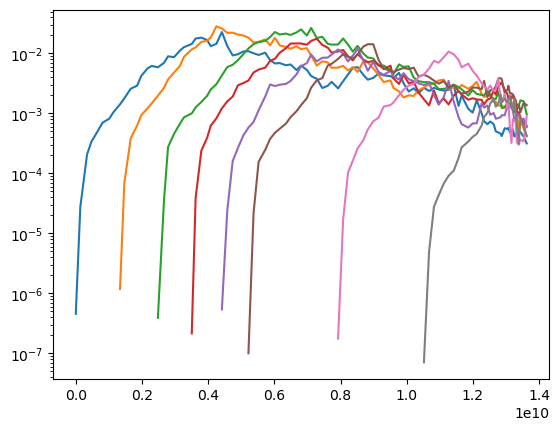

In [11]:
for lb_time, SFH in zip([lb_time99, lb_time91, lb_time84, lb_time78, lb_time72, lb_time67, lb_time50, lb_time33], 
                        [SFH2_99, SFH2_91, SFH2_84, SFH2_78, SFH2_72, SFH2_67, SFH2_50, SFH2_33]):
    plt.plot(lb_time, SFH)
    plt.yscale('log')

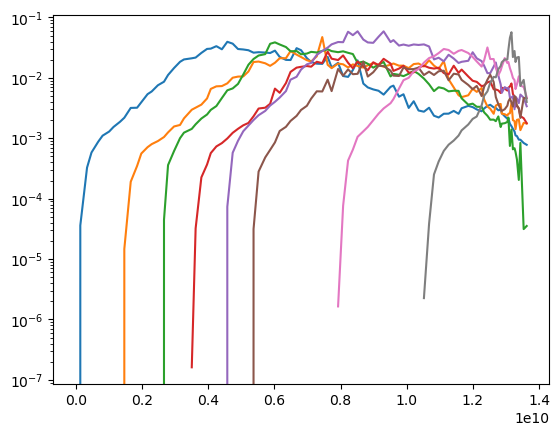

In [12]:
for lb_time, SFH in zip([lb_time99, lb_time91, lb_time84, lb_time78, lb_time72, lb_time67, lb_time50, lb_time33], 
                        [SFH3_99, SFH3_91, SFH3_84, SFH3_78, SFH3_72, SFH3_67, SFH3_50, SFH3_33, SFH3_25, SFH3_21, SFH3_17]):
    plt.plot(lb_time, SFH)
    plt.yscale('log')

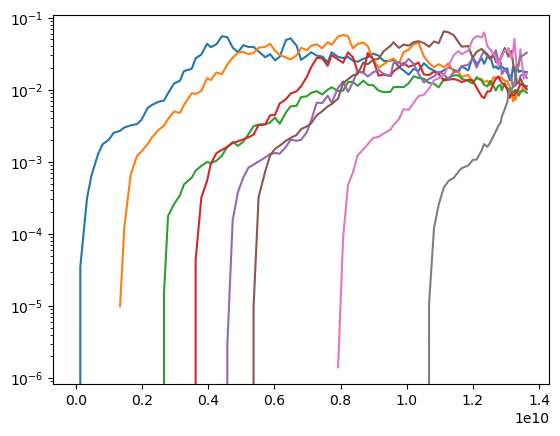

In [13]:
for lb_time, SFH in zip([lb_time99, lb_time91, lb_time84, lb_time78, lb_time72, lb_time67, lb_time50, lb_time33], 
                        [SFH4_99, SFH4_91, SFH4_84, SFH4_78, SFH4_72, SFH4_67, SFH4_50, SFH4_33, SFH4_25, SFH4_21, SFH4_17]):
    plt.plot(lb_time, SFH)
    plt.yscale('log')

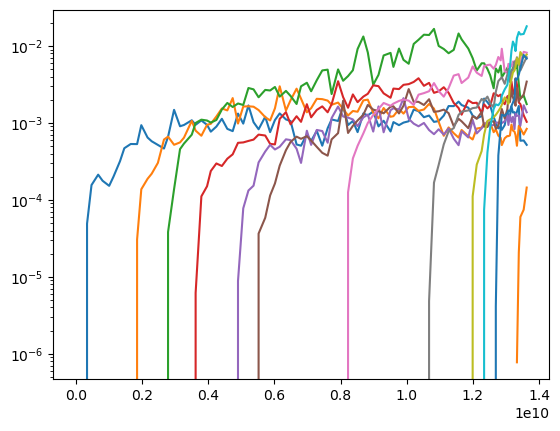

In [14]:
for lb_time, SFH in zip([lb_time99, lb_time91, lb_time84, lb_time78, lb_time72, lb_time67, lb_time50, lb_time33, lb_time25, lb_time21, 
                         lb_time17, lb_time04], [SFH5_99, SFH5_91, SFH5_84, SFH5_78, SFH5_72, SFH5_67, SFH5_50, SFH5_33, SFH5_25, SFH5_21,
                         SFH5_17, SFH5_04]):
    plt.plot(lb_time, SFH)
    plt.yscale('log')

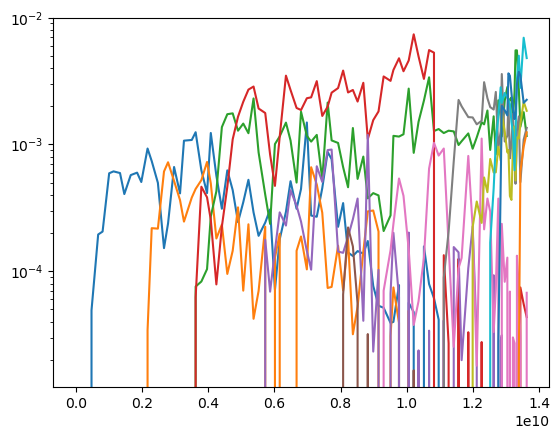

In [15]:
for lb_time, SFH in zip([lb_time99, lb_time91, lb_time84, lb_time78, lb_time72, lb_time67, lb_time50, lb_time33, lb_time25, lb_time21, 
                         lb_time17, lb_time04], [SFH6_99, SFH6_91, SFH6_84, SFH6_78, SFH6_72, SFH6_67, SFH6_50, SFH6_33, SFH6_25, SFH6_21,
                         SFH6_17, SFH6_04]):
    plt.plot(lb_time, SFH)
    plt.yscale('log')

In [ ]:
# PLOTS FOR PRESENTATION

(0.0, 14.0)

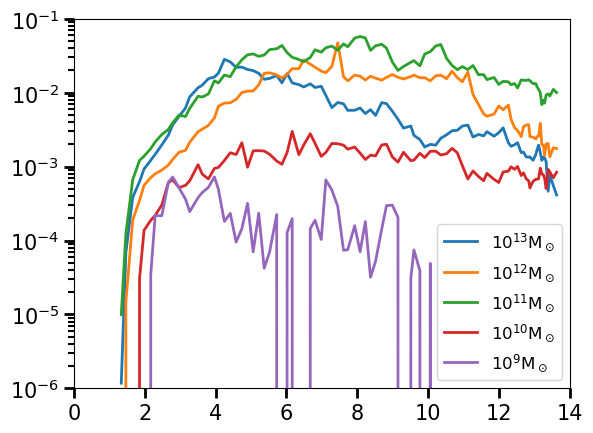

In [71]:
plt.rcParams.update({'font.size': 15})
mpl.rcParams['xtick.major.size'] = 7
mpl.rcParams['xtick.major.width'] = 2

mpl.rcParams['ytick.major.size'] = 7
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.size'] = 4
mpl.rcParams['ytick.minor.width'] = 1.5

plt.plot(lb_time91, SFH2_91, label='$10^{13}$M$_\odot$', linewidth=2)
plt.plot(lb_time91, SFH3_91, label='$10^{12}$M$_\odot$', linewidth=2)
plt.plot(lb_time91, SFH4_91, label='$10^{11}$M$_\odot$', linewidth=2)
plt.plot(lb_time91, SFH5_91, label='$10^{10}$M$_\odot$', linewidth=2)
plt.plot(lb_time91, SFH6_91, label='$10^{9}$M$_\odot$', linewidth=2)
plt.yscale('log')
plt.legend(fontsize=12)
plt.ylim(1e-6, 1e-1)
plt.xlim(0, 14)

(-1.0, 21.0)

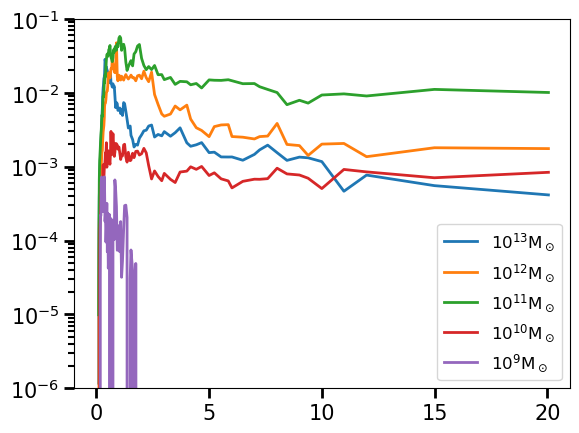

In [75]:
plt.rcParams.update({'font.size': 15})
mpl.rcParams['xtick.major.size'] = 7
mpl.rcParams['xtick.major.width'] = 2

mpl.rcParams['ytick.major.size'] = 7
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.size'] = 4
mpl.rcParams['ytick.minor.width'] = 1.5

plt.plot(redshifts[8:], SFH2_91, label='$10^{13}$M$_\odot$', linewidth=2)
plt.plot(redshifts[8:], SFH3_91, label='$10^{12}$M$_\odot$', linewidth=2)
plt.plot(redshifts[8:], SFH4_91, label='$10^{11}$M$_\odot$', linewidth=2)
plt.plot(redshifts[8:], SFH5_91, label='$10^{10}$M$_\odot$', linewidth=2)
plt.plot(redshifts[8:], SFH6_91, label='$10^{9}$M$_\odot$', linewidth=2)
plt.yscale('log')
plt.legend(fontsize=12)
plt.ylim(1e-6, 1e-1)
plt.xlim(-1, 21)